In [1]:
import pandas as pd
import numpy as np
from  sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

plt.style.use("fivethirtyeight")

In [40]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")


In [2]:
ticker_symbol =  [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'BRK-B', 'JPM', 'JNJ', 'V',
    'PG', 'NVDA', 'MA', 'HD', 'UNH', 'DIS', 'PYPL', 'BAC', 'CMCSA', 'ADBE',
    'TSLA', 'XOM', 'VZ', 'NFLX', 'CSCO', 'INTC', 'CVX', 'CRM', 'ABBV', 'PEP'
]

In [3]:

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 3 * 365 )

In [4]:
# Fetch historical data
stock_data = yf.download(ticker_symbol, start = start_date, end = end_date)


[*********************100%%**********************]  29 of 29 completed


In [5]:
stock_data = stock_data["Adj Close"]
stock_data

Ticker,AAPL,ABBV,ADBE,AMZN,BAC,BRK-B,CMCSA,CRM,CSCO,CVX,...,NFLX,NVDA,PEP,PG,PYPL,TSLA,UNH,V,VZ,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-11,123.962074,101.922127,485.190002,161.195496,38.573555,285.630005,53.196404,215.278778,48.250793,94.461433,...,495.079987,142.783356,134.028610,127.120399,248.600006,205.733337,394.759247,220.599808,48.899902,53.493946
2021-05-12,120.870644,101.984222,472.089996,157.597000,38.211658,282.910004,52.382267,210.265335,47.127396,95.054581,...,484.980011,137.316559,132.721909,125.774818,239.910004,196.630005,388.689728,215.854797,48.791317,53.780586
2021-05-13,123.036613,103.439117,474.160004,158.073502,38.824089,286.899994,53.094643,211.583618,47.940258,94.443710,...,486.660004,136.385849,134.691147,127.797798,240.800003,190.563339,391.748505,219.215393,49.125450,53.117733
2021-05-14,125.478249,103.288307,486.559998,161.145004,39.306602,290.679993,54.288086,217.376053,48.314724,96.913704,...,493.369995,142.152084,134.893570,128.066864,246.289993,196.580002,392.937469,222.350708,49.025200,54.434486
2021-05-17,124.316505,103.696404,482.739990,163.519501,39.659218,289.220001,51.309082,214.779434,48.351254,98.100006,...,488.940002,141.378586,134.507111,127.807076,244.360001,192.276672,391.815613,221.860809,48.398712,55.706436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-03,183.380005,163.789993,486.179993,186.210007,37.250000,400.869995,38.689999,273.660004,47.119999,160.250000,...,579.340027,887.890015,176.149994,164.460007,65.699997,181.190002,492.450012,268.489990,38.889999,116.000000
2024-05-06,181.710007,162.729996,493.589996,188.699997,37.689999,404.920013,38.490002,275.630005,47.110001,162.300003,...,596.969971,921.400024,175.820007,164.440002,65.610001,184.759995,494.380005,272.670013,39.330002,116.750000
2024-05-07,182.399994,162.550003,492.269989,188.759995,37.840000,406.140015,38.490002,277.179993,47.279999,162.669998,...,606.000000,905.539978,178.020004,165.759995,65.919998,177.809998,500.959991,276.459991,39.310001,116.169998


In [6]:
# Calculating the annual mean returnns and variances
 
# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate annual mean returns and variance
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252


In [50]:
stock_data.columns

Index(['AAPL', 'ABBV', 'ADBE', 'AMZN', 'BAC', 'BRK-B', 'CMCSA', 'CRM', 'CSCO',
       'CVX', 'DIS', 'GOOG', 'GOOGL', 'HD', 'INTC', 'JNJ', 'JPM', 'MA', 'MSFT',
       'NFLX', 'NVDA', 'PEP', 'PG', 'PYPL', 'TSLA', 'UNH', 'V', 'VZ', 'XOM'],
      dtype='object', name='Ticker')

In [8]:
# Extract stock symbols from the index of stock_data
stock_symbols = stock_data.columns

# Create a new DataFrame with stock symbols, annual return variance, and annual mean returns
stock_data_df = pd.DataFrame({
    'Stock_Symbols': stock_symbols,
    'Variance': annual_return_variance.values,
    'Returns': annual_mean_returns.values
})


In [9]:
stock_data_df


,Stock_Symbols,Variance,Returns
0,AAPL,0.072999,0.169457
1,ABBV,0.041224,0.172355
2,ADBE,0.136465,0.067620
3,AMZN,0.140436,0.124182
4,BAC,0.076871,0.035726
5,BRK-B,0.028884,0.134272
6,CMCSA,0.067251,-0.073892
7,CRM,0.130704,0.147264
8,CSCO,0.052777,0.023558
9,CVX,0.068718,0.221747


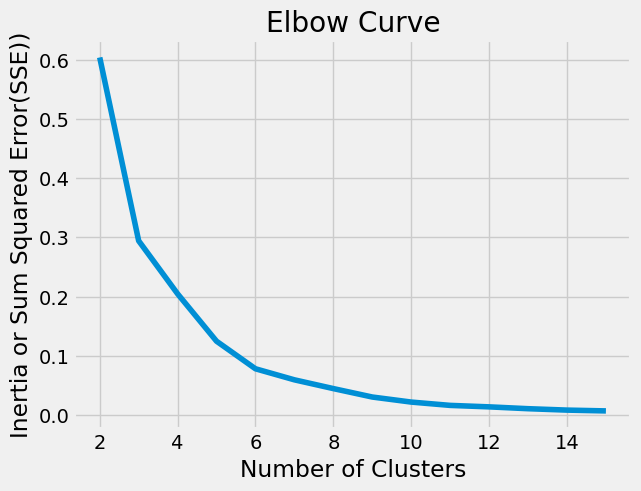

In [41]:
# Use Elbow method to determine the number of clusters to use to group the stocks

#Get and store the annual returns annd annual variances
X = stock_data_df[['Returns','Variance']].values
inertia_list = []
for K in range(2,16):
    #Create and train the model
    kmeans = KMeans(n_clusters = K )
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

#plot the data
plt.plot(range(2,16),inertia_list)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia or Sum Squared Error(SSE))")
plt.show()

In [42]:
# Get and show the labels

kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_


In [29]:
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 1, 0, 1])

In [30]:
stock_data_df['Kmeans_labels'] = labels


In [39]:
stock_data_df.sort_values(by=['Kmeans_labels'], axis=0)


,Stock_Symbols,Variance,Returns,Kmeans_labels
14,INTC,0.133393,-0.107201,0
23,PYPL,0.197885,-0.349645,0
6,CMCSA,0.067251,-0.073892,0
10,DIS,0.092963,-0.132822,0
27,VZ,0.043567,-0.047145,0
26,V,0.054031,0.104839,1
25,UNH,0.048888,0.108076,1
24,TSLA,0.331192,0.105695,1
22,PG,0.029116,0.103866,1
21,PEP,0.027323,0.108642,1


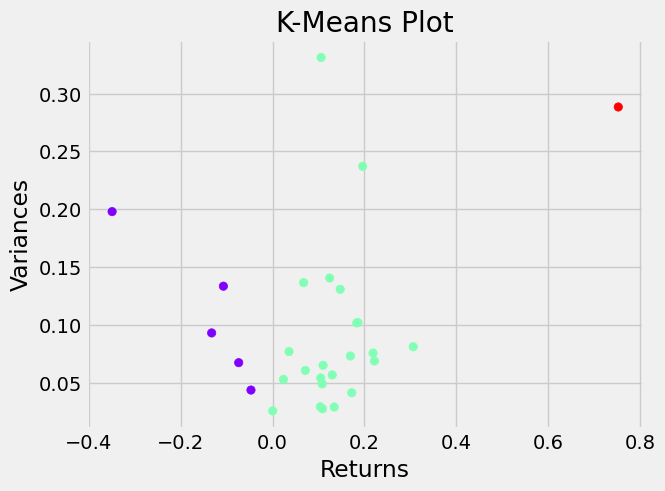

In [33]:
#Plot and showw differennt clusters
plt.scatter(X[:,0],X[:,1], c= labels, cmap = 'rainbow')
plt.title("K-Means Plot")
plt.xlabel("Returns")
plt.ylabel("Variances")
plt.show()

In [47]:
# Create a function  to build a simple diversed portfolio
def diversed_portfolio():
    diversified_portfolio = stock_data_df.groupby('Kmeans_labels').first()
    print(diversified_portfolio[['Stock_Symbols', 'Kmeans_labels']])


In [48]:
diversed_porfolio()

  Stock_Symbols  Kmeans_labels
6         CMCSA              0
  Stock_Symbols  Kmeans_labels
0          AAPL              1
   Stock_Symbols  Kmeans_labels
20          NVDA              2


In [ ]:
Algo